<a href="https://colab.research.google.com/github/kayleefoor/Foor_DSPN_S24/blob/main/Exercize17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [6]:
library(glmnet)
library(tidyverse)
library(ggplot2)

We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [8]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [9]:
train_index <- sample(1:n, 50, replace = FALSE)
train_data <- data.frame(x = x[train_index], y = y[train_index])
test_data <- data.frame(x = x[-train_index], y = y[-train_index])

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


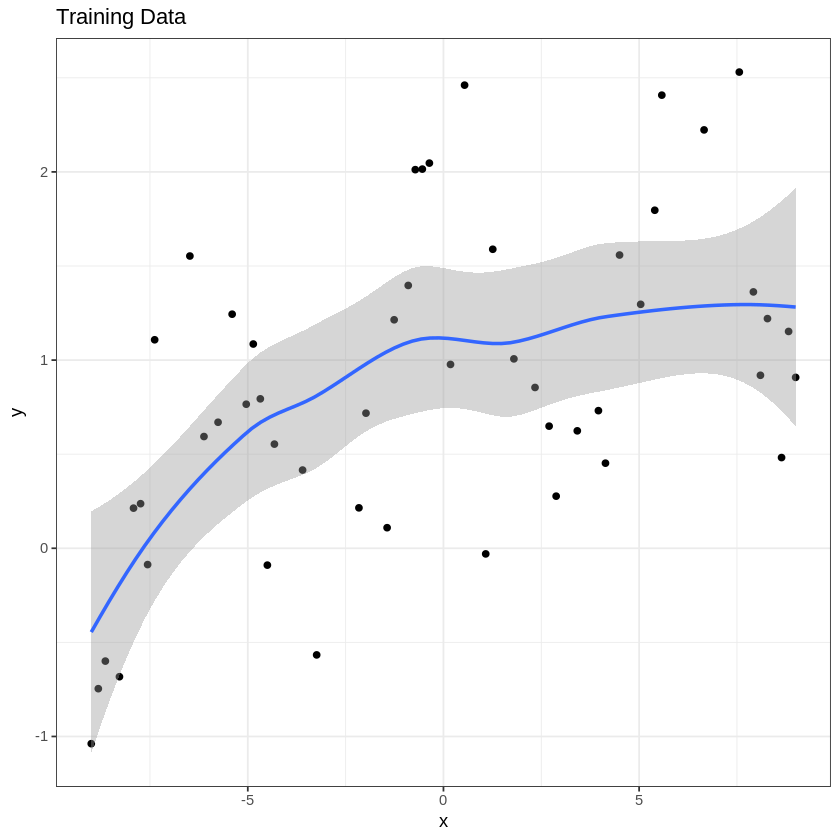

In [10]:
ggplot(train_data, aes(x = x, y = y)) +
  geom_point() +
  labs(title = "Training Data", x = "x", y = "y") +
  theme_bw() + geom_smooth()

How would you describe the relationship between $x$ and $y$ based on this plot?

> *There is a non-linear relationship between x and y. There is also noise present, so the graph isn't strongly fit.*
>

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results.


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


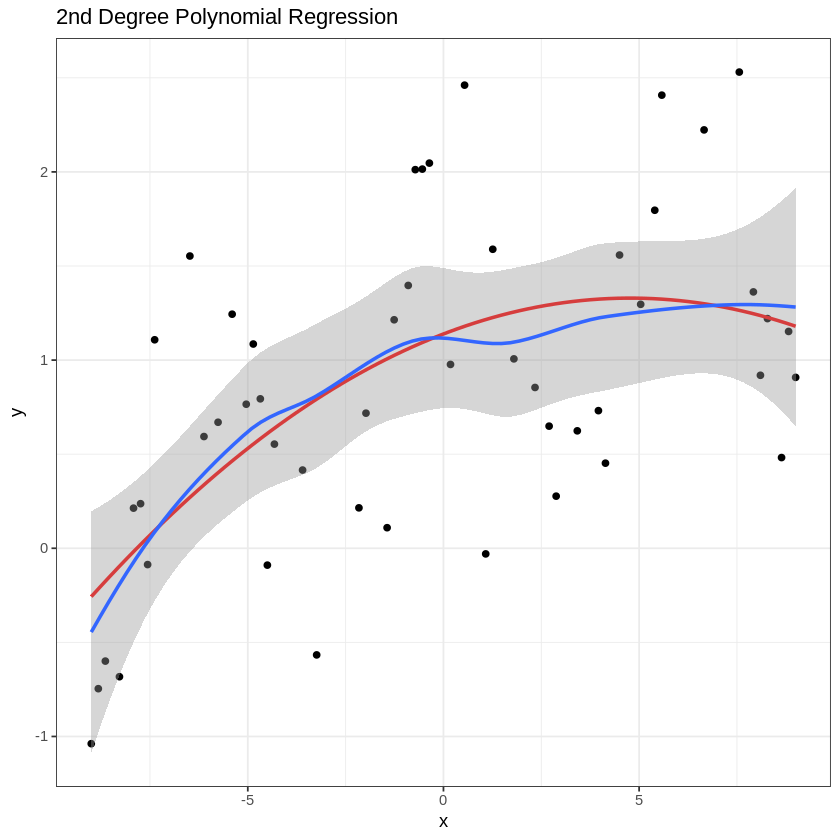

In [11]:
model_2nd_degree <- lm(y ~ poly(x, 2), data = train_data)

ggplot(train_data, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "red") +
  labs(title = "2nd Degree Polynomial Regression", x = "x", y = "y") +
  theme_bw() + geom_smooth()

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better?

> *The model captures the general upward trend but doesn't show the wavy pattern in the data. It could do better by incorporating higher-order terms to capture model's true complexity.*
>

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


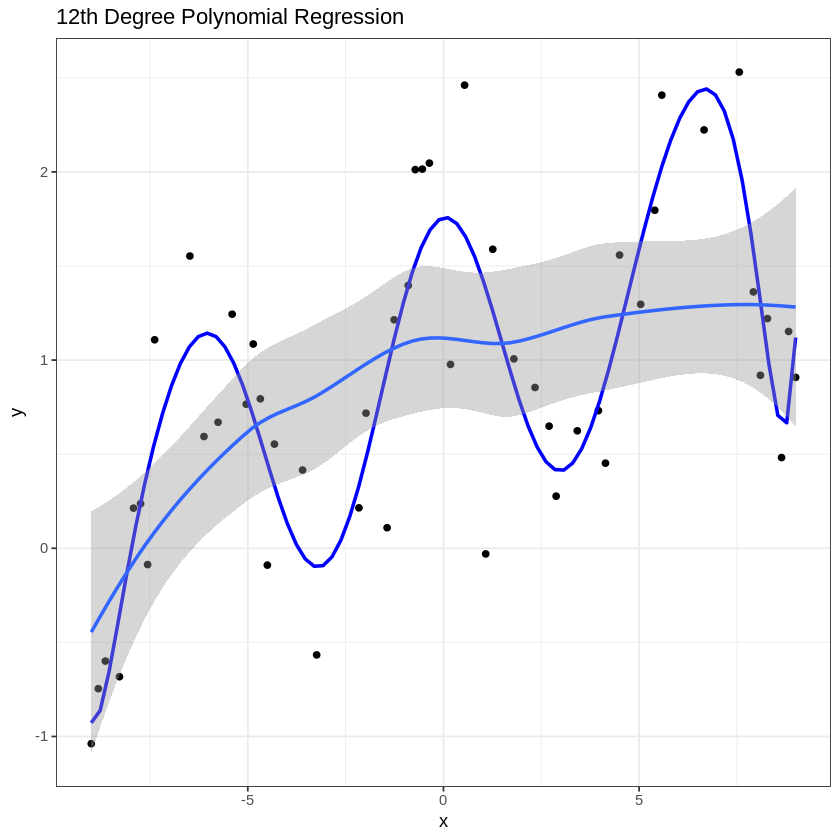

In [12]:
model_12th_degree <- lm(y ~ poly(x, 12), data = train_data)

ggplot(train_data, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 12), se = FALSE, color = "blue") +
  labs(title = "12th Degree Polynomial Regression", x = "x", y = "y") +
  theme_bw() + geom_smooth()

> *This model appears to fit the training data better than the 2nd degree model. It shows the wavy pattern more accurately, but it also looks like it's overfitted, so it might not generalize to the test data.*
>

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy.

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

In [19]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    model <- lm(y ~ poly(x, k), data = train_data)

    train_rss[k - 1] <- median((train_data$y - predict(model, newdata = train_data))^2)

    test_rss[k - 1] <- median((test_data$y - predict(model, newdata = test_data))^2)
}

# Plot your results here
data.frame(degree = degree, train_rss = train_rss, test_rss = test_rss) %>%
  pivot_longer(cols = c(train_rss, test_rss), names_to = "data_type", values_to = "rss") %>%
  ggplot(aes(x = degree, y = rss, color = data_type)) +
  geom_line() +
  labs(title = "Bias-Variance Tradeoff", x = "Polynomial Degree (k)", y = "Median RSS") +
  theme_bw() + geom_smooth()

ERROR: Error in if (is.null(np) | (np[2] <= 1)) stop("x should be a matrix with 2 or more columns"): argument is of length zero


What do you see as $k$ increase?

> *As k increases, train_rss decreases, which suggests better fit. test_rss decreases before increasing as k increases, which indicates the bias-variance tradeoff is in effect. By increasing model complexity (k) we can reduce bias and improve performance, but we risk overfitting the model which increases vairance and decreases performance.*
>

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree.

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



In [14]:
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # Fit the model
    model <- lm(y ~ poly(x, k), data = train_data)

    # Calculate training RSS
    train_rss[k - 1] <- median((train_data$y - predict(model, newdata = train_data))^2)

    # Calculate test RSS
    test_rss[k - 1] <- median((test_data$y - predict(model, newdata = test_data))^2)
}

data.frame(degree = degree, train_rss = train_rss, test_rss = test_rss) %>%
  pivot_longer(cols = c(train_rss, test_rss), names_to = "data_type", values_to = "rss") %>%
  ggplot(aes(x = degree, y = rss, color = data_type)) +
  geom_line() +
  geom_vline(xintercept = 50, linetype = "dashed") +
  labs(title = "Bias-Variance Tradeoff (k up to 150)", x = "Polynomial Degree (k)", y = "Median RSS") +
  theme_bw() + geom_smooth()

ERROR: Error in poly(x, k): 'degree' must be less than number of unique points


What do you see as $k$ gets larger than $n$?

> *As k > n the training error decreases because the model has enough df to perfectly fit the training data, but this makes the test error too large due to overfitting. The vertical line at k=n shows where the model goes from k < n to k > n. When k > n, the model is very sensitive to changes in the training data which prevents adequate generalization.*
>

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time.

In [16]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
   X_train <- poly(train_data$x, k)
    X_test <- poly(test_data$x, k)

    model <- glmnet(X_train, train_data$y, alpha = 0, lambda = lambda)

    train_rss[k - 1] <- median((train_data$y - predict(model, newx = X_train))^2)

    test_rss[k - 1] <- median((test_data$y - predict(model, newx = X_test))^2)
}

# Plot your results here
data.frame(degree = degree, train_rss = train_rss, test_rss = test_rss) %>%
  pivot_longer(cols = c(train_rss, test_rss), names_to = "data_type", values_to = "rss") %>%
  ggplot(aes(x = degree, y = rss, color = data_type)) +
  geom_line() +
  geom_vline(xintercept = 50, linetype = "dashed") + # Add vertical line at k = n
  labs(title = "Bias-Variance Tradeoff with Ridge Regression", x = "Polynomial Degree (k)", y = "Median RSS") +
  theme_bw() + geom_smooth()

ERROR: Error in poly(test_data$x, k): 'degree' must be less than number of unique points


What happens now when $k$ gets larger than $n$?

> *Per the lambda parameter used in RR, the behavior of the bias-variance tradeoff changes significantly when k > n. The test error remains stable when k > n. The training error decreases as k increases but not as much as the last model.*
>

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *RR changes the behavior of the bias-variance tradeoff by penalizing complex models. This penalty prevents overfitting. Without regularization, complex models become overfit and won't generalize Regularization mitigates flexibility by minimizing coefficients, which prevents overfitting*
>

---
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here*
>

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*